# Imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.animation import FuncAnimation
from functools import partial
import itertools
import matplotlib.animation as animation

# Class Vector with all functions

In [43]:
class Vector:

    # angle between 0 and 360
    # length positive float max value = 10
    # speed negative or positive float between -1 and 1
    def __init__(self, angle, length, speed) -> None:
        assert angle >= 0   and angle <= 360
        assert length <= 10 and length > 0
        assert speed >= -1  and speed <= 1
        self.angle  = angle
        self.length = length
        self.speed  = speed

        self.endpoint = self.getEndpoint()
        self.radius   = self.getRadius()

        self.origin = [0, 0]

    def getEndpoint(self) -> list:
        angle = self.angle * math.pi / 180; 
        x = self.length * math.sin(angle)
        y = self.length * math.cos(angle)
        return [x, y]

    def getRadius(self) -> float:
        return math.sqrt(self.endpoint[0]*self.endpoint[0] + self.endpoint[1]*self.endpoint[1])

    # FIXME speed has to be adjusted
    def getTimedEndpoint(self, time) -> list:
        fixedSpeed = 10
        angleIncrement = fixedSpeed * self.speed * time
        angle = ((self.angle + angleIncrement) % 360) * math.pi / 180; 
        x = self.length * math.sin(angle)
        y = self.length * math.cos(angle)
        return [x, y]
    
    def setOrigin(self, origin):
        self.origin = origin

# Creating n instances of Vector in a list

In [384]:
def createVectors(n) -> list:
    vectors = []
    for i in range(n):
        # initializing random angle, length and speed
        angle  = random.random() * 360
        length = ((abs(random.random()-0.5)+0.5) * (5 * (((n-i)+1) / (n+1))))
        if length == 0:
            length = 1
        speed  = (random.random() * 2) - 1
        newVector = Vector(angle, length, speed)

        vectors.append(newVector)

    return vectors


# Calculate all origins at time t

In [296]:
def calcOrigins(vectors, t) -> None:
    current_origin = np.array([0, 0])
    for vector in vectors:
        vector.setOrigin(current_origin)
        current_origin = current_origin + np.array(vector.getTimedEndpoint(t))

# Plot Vectors at time t

In [297]:
def plot(vectors, t) -> None:

    ax = plt.gca()

    for v in vectors:
        timedEndpoint = v.getTimedEndpoint(t)
        plt.arrow(
            v.origin[0], 
            v.origin[1], 
            timedEndpoint[0], 
            timedEndpoint[1],
            # width=.005,
            head_width=.1,
            length_includes_head=True,
            facecolor=None,
            edgecolor=None,
            color="black"
        )
        circle = plt.Circle(v.origin, v.radius, color='r', fill=False)
        ax.add_patch(circle)

    # ax.set_xlim([0, 2.2])
    # ax.set_ylim([0, 2.2])
    plt.axis([-25, 25, -25, 25])
    ax.set_aspect('equal', adjustable='box')

    plt.savefig(f'./tmpSavedPlots/{t}-plot.png', dpi=300)

    plt.show()

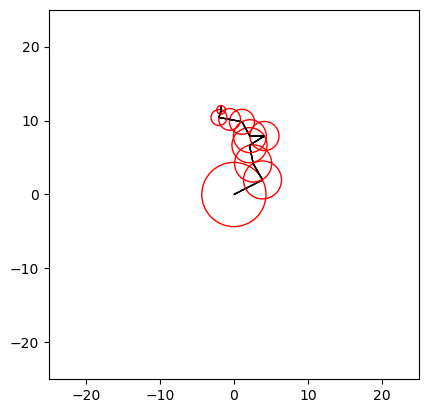

In [298]:
vectors = createVectors(10)
calcOrigins(vectors, 0)

plot(vectors, 0)

# Animate Vectors

In [299]:
vectors = createVectors(10)

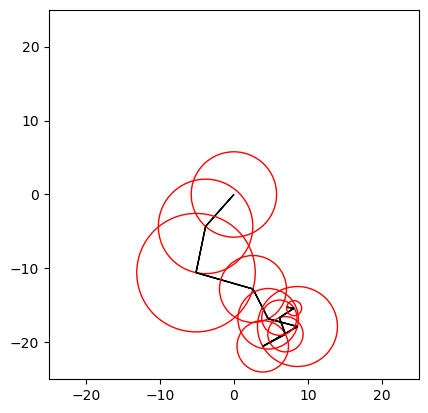

99


In [278]:
from IPython.display import clear_output

for i in range(100):
    clear_output(wait=True)
    calcOrigins(vectors, i)
    plot(vectors, i)
    print(i)

## Convert images to Video

In [19]:
import os

os.system("ffmpeg -r 30 -i ./tmpSavedPlots/%01d-plot.png -vcodec mpeg4 -y ./videos/movie.mp4")

0

# Getting all endpoints as graph

In [300]:
# getting end of all vectors
def getEnd(vectors, t):
    end = np.array([0, 0])
    for i in vectors:
        end = end + np.array(i.getTimedEndpoint(t))
    return end

In [301]:
# loop through n frames and return all endpoints
def getAllEnds(vectors, n):
    ends = []
    for i in range(n):
        ends.append(getEnd(vectors, i))
    return ends

In [410]:
vectors = createVectors(10)

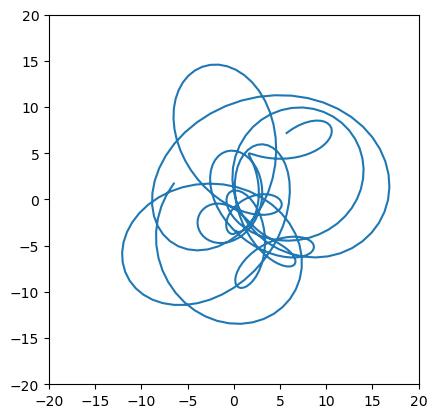

In [509]:
size = 20
vectors = createVectors(10)
# vectors = createVectors(2)
allEnds = np.array(getAllEnds(vectors, 500))
ax = plt.gca()
plt.axis([-size, size, -size, size])
ax.set_aspect('equal', adjustable='box')
plt.plot(allEnds[:,0], allEnds[:,1]);

# Plot all Ends animation

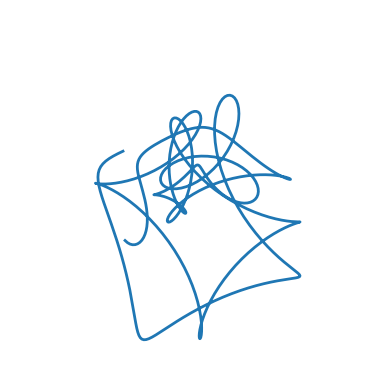

In [448]:
def data_gen():
    for index, x in enumerate(allEnds[:,0]):
        yield x, allEnds[index,1]


def init():
    plt.axis([-15, 15, -15, 15])
    ax.set_aspect('equal', adjustable='box')
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
plt.axis('off')
# ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=1000, init_func=init,
                              save_count=1000)

f = "./videos/animationTest.avi" 
writervideo = animation.FFMpegWriter(fps=20, bitrate=-1) 
ani.save(f, writer=writervideo, dpi=300)

plt.show()

# Connect path and vector dsplaying

In [24]:
def plotAll(vectors, t) -> None:

    allEnds = np.array(getAllEnds(vectors, t))
    plt.plot(
        allEnds[:,0], 
        allEnds[:,1],
        zorder=1
    )

    ax = plt.gca()

    for v in vectors:
        timedEndpoint = v.getTimedEndpoint(t)
        plt.arrow(
            v.origin[0], 
            v.origin[1], 
            timedEndpoint[0], 
            timedEndpoint[1],
            # width=.005,
            head_width=.1,
            length_includes_head=True,
            facecolor=None,
            edgecolor=None,
            color="black",
            alpha=.5,
            zorder=2
        )
        circle = plt.Circle(
            v.origin, 
            v.radius, 
            color='r', 
            fill=False,
            alpha=.2,
            zorder=3
        )
        ax.add_patch(circle)

    # ax.set_xlim([0, 2.2])
    # ax.set_ylim([0, 2.2])
    plt.axis([-15, 15, -15, 15])
    ax.set_aspect('equal', adjustable='box')

    plt.savefig(f'./tmpSavedPlotsAll/{t}-plot.png', dpi=300)

    plt.show()

In [25]:
def plotAllAtTime(vectors, t):
    calcOrigins(vectors, t)
    plotAll(vectors, t)

In [26]:
vectors = createVectors(10)

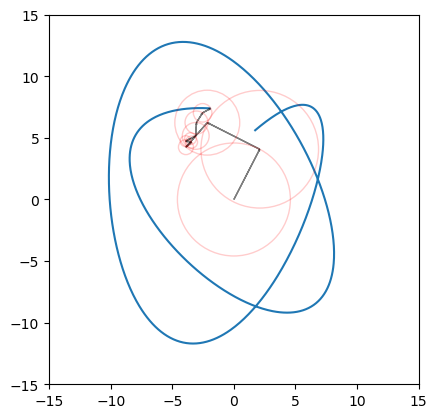

999


In [30]:
for i in range(1000):
    clear_output(wait=True)
    plotAllAtTime(vectors, i+1)
    print(i)

## convert to video

In [31]:
import os

# os.system("ffmpeg -r 30 -i ./tmpSavedPlotsAll/%01d-plot.png -c:v veryslow -crf 50 -vcodec mpeg4 -y all.mp4")
# os.system("ffmpeg -framerate 30 -i ./tmpSavedPlotsAll/%01d-plot.png -codec copy all.mkv")
# os.system("ffmpeg -i ./tmpSavedPlotsAll/%01d-plot.png -vf scale=1920:1440 -vcodec mpeg4 output.mp4")
# print("hi")
# os.system("ffmpeg -i ./tmpSavedPlotsAll/%01d-plot.png -c:v libx264 -r 30 -pix_fmt yuv420p output.mp4")
os.system("ffmpeg -r 30 -i ./tmpSavedPlotsAll/%01d-plot.png -c:v veryslow -vcodec mpeg4 -y -pix_fmt yuv420p ./videos/movie.mp4")

0